In [40]:
# import nltk

# nltk.download("punkt")        # main tokenizer
# nltk.download("punkt_tab")    # NEW resource (needed since v3.9+)
# nltk.download("averaged_perceptron_tagger")  # for pos_tag
# nltk.download('averaged_perceptron_tagger_eng')



In [1]:
import numpy as np
import pandas as pd
import os
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag


In [2]:
os.path.exists('ner-getting-started/train.csv')

True

In [3]:
# read data from nlp-getting-started
nlp_start_df = pd.read_csv('ner-getting-started/train.csv')

In [44]:
nlp_start_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
# take one example sentence 
ex = nlp_start_df.loc[159]['text']

In [46]:
ex

'Experts in France begin examining airplane debris found on Reunion Island: French air accident experts on Wedn... http://t.co/v4SMAESLK5'

In [47]:
import nltk
print(nltk.__version__)


3.9.1


In [48]:
# tokenize the sencence and apply POS tagging
sent = pos_tag(word_tokenize(ex))
sent

[('Experts', 'NNS'),
 ('in', 'IN'),
 ('France', 'NNP'),
 ('begin', 'VB'),
 ('examining', 'VBG'),
 ('airplane', 'JJ'),
 ('debris', 'NN'),
 ('found', 'VBD'),
 ('on', 'IN'),
 ('Reunion', 'NNP'),
 ('Island', 'NNP'),
 (':', ':'),
 ('French', 'JJ'),
 ('air', 'NN'),
 ('accident', 'NN'),
 ('experts', 'NNS'),
 ('on', 'IN'),
 ('Wedn', 'NNP'),
 ('...', ':'),
 ('http', 'NN'),
 (':', ':'),
 ('//t.co/v4SMAESLK5', 'NN')]

if we want to chunk only 'NN' tags, we need to use pattern
`mychunk:{<NN>}`
but if we need to chunk all types of tags which start with 'NN', we'll use
`mychunk:{<NN.*>}`.

In [49]:
#pip install svgling

After Chunking (S
  (mychunk Experts/NNS)
  in/IN
  (mychunk France/NNP)
  begin/VB
  examining/VBG
  airplane/JJ
  (mychunk debris/NN)
  found/VBD
  on/IN
  (mychunk Reunion/NNP Island/NNP)
  :/:
  French/JJ
  (mychunk air/NN accident/NN experts/NNS)
  on/IN
  (mychunk Wedn/NNP)
  .../:
  (mychunk http/NN)
  :/:
  (mychunk //t.co/v4SMAESLK5/NN))


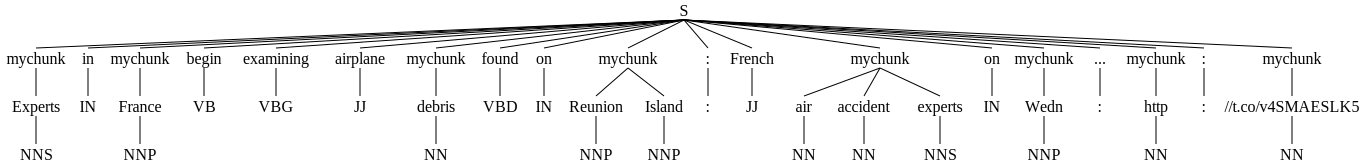

In [50]:
from nltk import RegexpParser
from nltk.draw.tree import TreeView
from IPython.display import Image
import svgling

# chunk all adjacence nouns
patterns= """mychunk:{<NN.*>+}"""
chunker = RegexpParser(patterns)
output = chunker.parse(sent)
print("After Chunking",output)
svgling.draw_tree(output)

Similarly as part-of-speech tags, IOB tags are a slightly different way for representing chunk structures. This format can denote the inside, outside, and beginning of a chunk.

In [51]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint

iob_tagged = tree2conlltags(output)
iob_tagged

[('Experts', 'NNS', 'B-mychunk'),
 ('in', 'IN', 'O'),
 ('France', 'NNP', 'B-mychunk'),
 ('begin', 'VB', 'O'),
 ('examining', 'VBG', 'O'),
 ('airplane', 'JJ', 'O'),
 ('debris', 'NN', 'B-mychunk'),
 ('found', 'VBD', 'O'),
 ('on', 'IN', 'O'),
 ('Reunion', 'NNP', 'B-mychunk'),
 ('Island', 'NNP', 'I-mychunk'),
 (':', ':', 'O'),
 ('French', 'JJ', 'O'),
 ('air', 'NN', 'B-mychunk'),
 ('accident', 'NN', 'I-mychunk'),
 ('experts', 'NNS', 'I-mychunk'),
 ('on', 'IN', 'O'),
 ('Wedn', 'NNP', 'B-mychunk'),
 ('...', ':', 'O'),
 ('http', 'NN', 'B-mychunk'),
 (':', ':', 'O'),
 ('//t.co/v4SMAESLK5', 'NN', 'B-mychunk')]

Recognizing a named entity is a specific kind of chunk extraction that uses entity tags along with chunk tags. Common entity tags include PERSON, LOCATION, and ORGANIZATION. NLTK has already a pre-trained named entity chunker which can be used using ne_chunk() method in the nltk.chunk module.

In [52]:
# nltk.download('maxent_ne_chunker_tab')
# nltk.download('words')

In [53]:
from nltk.chunk import ne_chunk
ne_res = ne_chunk(sent)

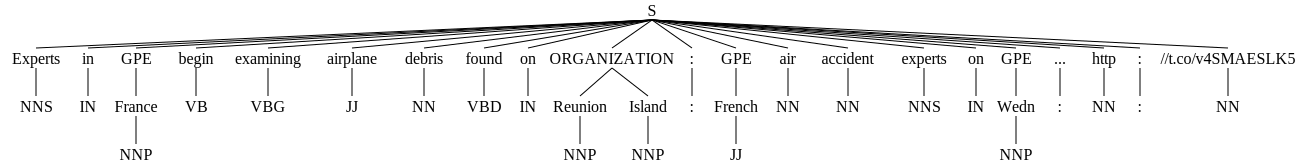

In [54]:
ne_res

In [55]:
def extract_ne(trees, labels):
    
    ne_list = []
    for tree in ne_res:
        if hasattr(tree, 'label'):
            if tree.label() in labels:
                ne_list.append(tree)
    
    return ne_list

In [56]:
labels = ['ORGANIZATION']
print(extract_ne(ne_res, labels))

[Tree('ORGANIZATION', [('Reunion', 'NNP'), ('Island', 'NNP')])]


**spaCy** features an extremely fast statistical entity recognition system, that assigns labels to contiguous spans of tokens. The default trained pipelines can identify a variety of named and numeric entities, including companies, locations, organizations and products.

In [57]:
import sqlite3

cnx = sqlite3.connect('ner-getting-started/wikibooks.sqlite')
df_wikibooks = pd.read_sql_query("SELECT * FROM en", cnx)
df_wikibooks.head()

,title,url,abstract,body_text,body_html
0,Wikibooks: Radiation Oncology/NHL/CLL-SLL,https://en.wikibooks.org/wiki/Radiation_Oncolo...,Chronic Lymphocytic Leukemia and Small Lymphoc...,Front Page: Radiation Oncology | RTOG Trials |...,"<div class=""mw-parser-output""><table width=""10..."
1,Wikibooks: Romanian/Lesson 9,https://en.wikibooks.org/wiki/Romanian/Lesson_9,==Băuturi/Beverages==,Băuturi/Beverages[edit | edit source]\nTea : C...,"<div class=""mw-parser-output""><h2><span id=""B...."
2,Wikibooks: Karrigell,https://en.wikibooks.org/wiki/Karrigell,Karrigell is an open Source Python web framewo...,Karrigell is an open Source Python web framewo...,"<div class=""mw-parser-output""><p>Karrigell is ..."
3,Wikibooks: The Pyrogenesis Engine/0 A.D./GuiSe...,https://en.wikibooks.org/wiki/The_Pyrogenesis_...,====setupUnitPanel====,setupUnitPanel[edit | edit source]\nHelper fun...,"<div class=""mw-parser-output""><h4><span class=..."
4,Wikibooks: LMIs in Control/pages/Exterior Coni...,https://en.wikibooks.org/wiki/LMIs_in_Control/...,== The Concept ==,Contents\n\n1 The Concept\n2 The System\n3 The...,"<div class=""mw-parser-output""><div id=""toc"" cl..."


spaCy’s trained pipelines can be installed as Python packages. This means that they’re a component of your application, just like any other module. They’re versioned and can be defined as a dependency in your requirements.txt. Trained pipelines can be installed from a download URL or a local directory, manually or via pip. Their data can be located anywhere on your file system.

In [58]:
# !python -m spacy download en_core_web_sm

In [59]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [60]:
wiki_ex = df_wikibooks.iloc[11]['body_text']
doc = nlp(wiki_ex)
doc

This Wikibooks page is a fact sheet and analysis on the article "Habitual physical activity in children and adolescents with cystic fibrosis" about how exercise is related to the disease Cystic Fibrosis.

Contents

1 Background of this research
2 Where is the research from ?
3 What kind of research was this?
4 What did the research involve?

4.1 Pulmonary Function testing
4.2 Pros / Cons of this test


5 What were the basic results?
6 What conclusion can we take from this research ?
7 Practical Advice
8 Further information/ Resources

8.1 Cystic Fibrosis Australia
8.2 Cystic Fibrosis's National Ambassador Nathan Charles


9 References



Background of this research[edit | edit source]
The research was about the effects of taking part in exercise constantly or making it a habit in the population of children and teens that are severing from the genetic condition cystic Fibrosis.
What is  Cystic Fibrosis
It is a genetic condition, affecting lungs and digestion. Unfortunately, there is no 

In [61]:
type(doc)

spacy.tokens.doc.Doc

In [62]:
print('All entity types that spacy recognised from the document above')
set([ent.label_ for ent in doc.ents])

All entity types that spacy recognised from the document above


{'CARDINAL', 'DATE', 'EVENT', 'GPE', 'LOC', 'ORG', 'PERSON', 'PRODUCT', 'TIME'}

In [63]:
print('Persons from the document above')
print(set([ent for ent in doc.ents if ent.label_ == 'PERSON']))
print('Organizations from the document above')
print(set([ent for ent in doc.ents if ent.label_ == 'ORG']))

Persons from the document above
{Nixon, KELSEY S. Habitual, Nathan Charles, A. Nixon P, Nathan Charles, ↑ Charles N. NATIONAL, David Michael Orenstein, Patricia, F. Kelsey S. Measuring Physical Activity, Berger, David Michael, A. Washburn, Nathan Charles, Nathan, Nathan Charles Web}
Organizations from the document above
{Pros / Cons, Godfrey, Cystic Fibrosis, Cystic Fibrosis, Practical Advice, CF, the Journal of Paediatric Pulmonology, National, CF, CF, CF, Kelsey S, the Australian Cystic Fibrosis Council, the American Children’s, Pulmonary Function, Cystic Fibrosis, Cystic Fibrosis, CF, Brackel H, CF, Cystic Fibrosis, Cystic Fibrosis's, CF, Children with Cystic Fibrosis, National, the CF community.[3] Two, Pediatric Pulmonology, CF, CF}


In [64]:
# from spacy import displacy
# displacy.render(doc, style="ent", jupyter=True)

BERT NER
BERT (Bidirectional Encoder Representations from Transformers) is a neural network that is capable of parsing language in the same way a human does. It uses word embeddings to translate words into numbers and then back again, allowing it to understand word context and meaning.
Hugging face is one of the most used NLP libraries. With this library, we can leverage popular NLP models, such as BERT, DistilBERT roBERTa and use those models to manipulate text in one way or another. Hugging Face provides simple access to a variety of models and datasets used for all possible NLP tasks.
Models for NER tasks can be found under the "Token Classification" section here:
https://huggingface.co/models?pipeline_tag=token-classification&sort=trending

Great Hugging Face course about transformers and the usage of the library can be found here https://huggingface.co/course/chapter0?fw=pt

In [65]:
# pip install transformers


In [66]:
# pip install torch torchvision torchaudio

In [1]:
from transformers import pipeline
import torch

In [2]:
import pandas as pd
nlp_start_df = pd.read_csv('ner-getting-started/train.csv')
# take one example sentence 
ex = nlp_start_df.loc[159]['text']

In [3]:
ex

'Experts in France begin examining airplane debris found on Reunion Island: French air accident experts on Wedn... http://t.co/v4SMAESLK5'

In [4]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())  # optional, just to test


2.8.0+cpu
False


In [5]:
generator = pipeline("ner",
                     model="dslim/bert-base-NER",
                     grouped_entities=True)
generator(ex)

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
c:\Users\ishar\AppData\Local\Programs\Python\Python313\Lib\site-packages\transformers\pipelines\token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


[{'entity_group': 'LOC',
  'score': np.float32(0.9996474),
  'word': 'France',
  'start': 11,
  'end': 17},
 {'entity_group': 'LOC',
  'score': np.float32(0.9992249),
  'word': 'Re',
  'start': 59,
  'end': 61},
 {'entity_group': 'LOC',
  'score': np.float32(0.8416335),
  'word': '##union Island',
  'start': 61,
  'end': 73},
 {'entity_group': 'MISC',
  'score': np.float32(0.9997576),
  'word': 'French',
  'start': 75,
  'end': 81}]

The process of training a neural network is a difficult and time-consuming process and for most of the users not even feasible. Because of that, instead of training the model from scratch, we can use models from Hugging Face which has been trained using a large amount of text.

These types of models through training developed a statistical understanding of the language they have been trained on, but they might not be useful for our specific task. In order to utilize the knowledge of the model, we can apply fine-tuning. It means that we can take pretrained model and train it a little bit more with our annotated data.

This process is called transfer learning when the knowledge is transfered from one model to another one and that strategy is often used in deep learning.

In [ ]:

df = pd.read_csv('ner_dataset.csv', encoding='ISO-8859-1')
df['Sentence #'] = df['Sentence #'].ffill()
df_gr = df.groupby('Sentence #').agg(lambda x: list(x))

df_gr.head()

,Word,POS,Tag
Sentence #,,,
Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo..."
Sentence: 10,"[Iranian, officials, say, they, expect, to, ge...","[JJ, NNS, VBP, PRP, VBP, TO, VB, NN, TO, JJ, J...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
Sentence: 100,"[Helicopter, gunships, Saturday, pounded, mili...","[NN, NNS, NNP, VBD, JJ, NNS, IN, DT, NNP, JJ, ...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O..."
Sentence: 1000,"[They, left, after, a, tense, hour-long, stand...","[PRP, VBD, IN, DT, NN, JJ, NN, IN, NN, NNS, .]","[O, O, O, O, O, O, O, O, O, O, O]"
Sentence: 10000,"[U.N., relief, coordinator, Jan, Egeland, said...","[NNP, NN, NN, NNP, NNP, VBD, NNP, ,, NNP, ,, J...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo..."


In [7]:
df

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
...,...,...,...,...
1048570,Sentence: 47959,they,PRP,O
1048571,Sentence: 47959,responded,VBD,O
1048572,Sentence: 47959,to,TO,O
1048573,Sentence: 47959,the,DT,O


In our case, we'll need columns Word(tokenized sentence) and Tag(entities in the sentence). Also, in order to fine-tune the model, we'll need to have the same entities as the model is trained on. Let's print entities from our data set and from the pretrained model.

In [8]:
tags = []
for tag in df_gr['Tag'].to_list():
    tags.extend(tag)
print('Entities in our data set')
set(tags)

Entities in our data set


{'B-art',
 'B-eve',
 'B-geo',
 'B-gpe',
 'B-nat',
 'B-org',
 'B-per',
 'B-tim',
 'I-art',
 'I-eve',
 'I-geo',
 'I-gpe',
 'I-nat',
 'I-org',
 'I-per',
 'I-tim',
 'O'}

In [9]:
from transformers import AutoModelForTokenClassification

model_checkpoint = "dslim/bert-base-NER"
model = AutoModelForTokenClassification.from_pretrained(model_checkpoint)

print('Entities from the pretrained model')
model.config.id2label

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Entities from the pretrained model


{0: 'O',
 1: 'B-MISC',
 2: 'I-MISC',
 3: 'B-PER',
 4: 'I-PER',
 5: 'B-ORG',
 6: 'I-ORG',
 7: 'B-LOC',
 8: 'I-LOC'}

In [10]:
print('Entities lables from the pretrained model')
for label in model.config.id2label.values():
    print(label)

Entities lables from the pretrained model
O
B-MISC
I-MISC
B-PER
I-PER
B-ORG
I-ORG
B-LOC
I-LOC


Create the mapping for converting entities from our data set into the entity id (key) from the 0

In [11]:
entity_mapping = {
'O':0,'B-per':3, 'I-per':4, 'B-org':5, 'I-org':6,'B-geo':7, 'I-geo':8,
'B-art':1, 'B-eve':1 , 'B-gpe':1, 'B-nat':1, 'B-tim':1,
'I-art':1, 'I-eve':1 , 'I-gpe':1, 'I-nat':1, 'I-tim':1,
}

In [12]:
class NERDataset:
    def __init__(self, df):
        # input is annotated data frame
        self.texts = df['Word'].to_list()
        self.tags = df['Tag'].to_list()
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, item):
        text = self.texts[item]
        tags = self.tags[item]
        
        ids = []
        target_tag =[]
        
        # tokenize words and define tags accordingly
        # running -> [run, ##ning]
        # tags - ['O', 'O']
        for i, s in enumerate(text):
            inputs = tokenizer.encode(s, add_special_tokens=False)
            input_len = len(inputs)
            ids.extend(inputs)
            target_tag.extend([entity_mapping[tags[i]]] * input_len)
        
        # truncate
        ids = ids[:MAX_LEN - 2]
        target_tag = target_tag[:MAX_LEN - 2]
        
        # add special tokens
        ids = [101] + ids + [102]
        target_tag = [0] + target_tag + [0]
        mask = [1] * len(ids)
        token_type_ids = [0] * len(ids)
        
        # construct padding
        padding_len = MAX_LEN - len(ids)
        ids = ids + ([0] * padding_len)
        mask = mask + ([0] * padding_len)
        token_type_ids = token_type_ids + ([0] * padding_len)
        target_tag = target_tag + ([0] * padding_len)
        
        return {'input_ids': torch.tensor(ids, dtype=torch.long),
                'attention_mask': torch.tensor(mask, dtype=torch.long),
                'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
                'labels': torch.tensor(target_tag, dtype=torch.long)
               }

In [2]:
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
import torch

# Split the data into training and validation sets
df_train, df_val = train_test_split(df_gr, test_size=0.2, random_state=42)

# Split the validation set into a new test set
df_val, df_test = train_test_split(df_val, test_size=0.5, random_state=42)


model_checkpoint = "dslim/bert-base-NER"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

MAX_LEN = 256 ##128

data_train = NERDataset(df_train)
data_val = NERDataset(df_val)
data_test = NERDataset(df_test)

# initialize DataLoader used to return batches for training/validation
loader_train = torch.utils.data.DataLoader(
    data_train, batch_size=32, num_workers=4
)

loader_val = torch.utils.data.DataLoader(
    data_val, batch_size=32, num_workers=4
)

NameError: name 'df_gr' is not defined

In [14]:
data_val

In [15]:
loader_val

In [16]:
from torch.optim import AdamW
from transformers import AutoModelForTokenClassification, get_scheduler
from tqdm.notebook import tqdm
from sklearn.metrics import f1_score, accuracy_score

model = AutoModelForTokenClassification.from_pretrained(model_checkpoint)

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [1]:
# just train the linear classifier on top of BERT
param_optimizer = list(model.classifier.named_parameters())
optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]
optimizer = AdamW(
    optimizer_grouped_parameters,
    # lr=3e-5,
    lr = 5e-5,
    eps=1e-12
)

NameError: name 'model' is not defined

In [ ]:
## full finetuning
optimizer = AdamW(model.parameters())

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# add scheduler to linearly reduce the learning rate throughout the epochs.
num_epochs = 1 ##3
num_training_steps = num_epochs * len(loader_train)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)


progress_bar = tqdm(range(num_training_steps),refresh=True)
for epoch in range(num_epochs):
    model.train()
    final_loss = 0
    predictions , true_labels = [], []
    for batch in loader_train:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        true_labels.extend(batch['labels'].detach().cpu().numpy().ravel())
        predictions.extend(np.argmax(outputs[1].detach().cpu().numpy(), axis=2).ravel())
        
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)
        final_loss+=loss.item()
        
    print(f'Training loss: {final_loss/len(loader_train)}')
    print('Training F1: {}'.format(f1_score(predictions, true_labels, average='macro')))
    print(f'Training acc: {accuracy_score(predictions, true_labels)}')
    print('*'*20)
    
    model.eval()
    final_loss = 0
    predictions , true_labels = [], []
    for batch in loader_val:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        final_loss+=outputs.loss.item()
        true_labels.extend(batch['labels'].detach().cpu().numpy().ravel())
        predictions.extend(np.argmax(outputs[1].detach().cpu().numpy(), axis=2).ravel())
    print(f'Validation loss: {final_loss/len(loader_val)}')
    print('Vallidation F1: {}'.format(f1_score(predictions, true_labels, average='macro')))
    print(f'Validaton acc: {accuracy_score(predictions, true_labels)}')
    print('*'*20)

  0%|          | 0/1199 [00:00<?, ?it/s]

In [ ]:
import numpy as np

# test the model
test_sentence = """
Mr. Trump’s tweets began just moments after a Fox News report by Mike Tobin, a 
reporter for the network, about protests in Minnesota and elsewhere. 
"""
tokenized_sentence = tokenizer.encode(test_sentence)
tokenized_sentence

In [ ]:

input_ids = torch.tensor([tokenized_sentence]).cuda()
with torch.no_grad():
    output = model(input_ids)
label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)
# join bpe split tokens
tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])
new_tokens, new_labels = [], []

for token, label_idx in zip(tokens, label_indices[0]):
    if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        new_labels.append(label_idx)
        new_tokens.append(token)
        
for token, label in zip(new_tokens, new_labels):
    print("{}\t{}".format(model.config.id2label[label], token))

In [ ]:
import os

# Get the current directory
current_directory = os.path.dirname(os.path.abspath(__file__))

# Save the trained model in the same directory as the notebook
model_path = os.path.join(current_directory, "model.pth")
torch.save(model.state_dict(), model_path)